In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import shutil
from os import listdir
from os.path import isfile, join
from scipy.signal import find_peaks

plt.style.use('figuras_lucio.mplstyle')

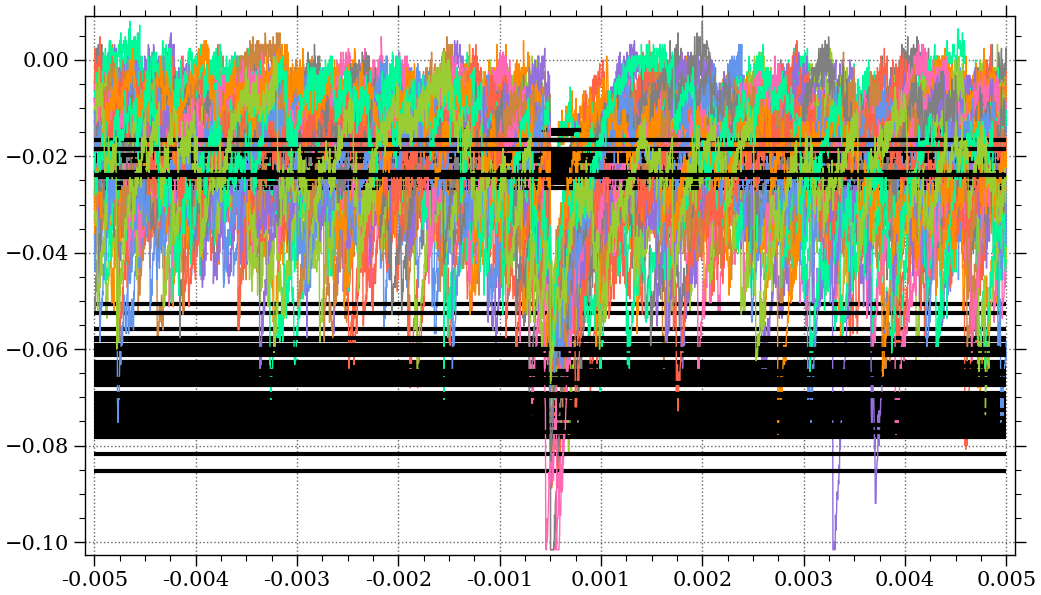

In [9]:
path = f'Clase 01-11/Ruido de fondo/Iteración 0'

onlyfiles = [file for file in listdir(path) if isfile(join(path, file))]

fig, ax = plt.subplots()

for file in onlyfiles:
    df = pd.read_csv(join(path, file))
    t = df['Datos'].values
    d = df["Tiempo"].values
    d_mean = np.mean(d)
    d_std = np.std(d)

    ax.plot(t,d,linewidth = 1);
    ax.hlines(d_mean - 4*d_std,t[0],t[-1],color = 'black');
    ax.hlines(d_mean,t[0],t[-1],color = 'black');

xlabels = np.linspace(t[0],t[-1],10,endpoint = True)
ax.set_xticks(xlabels)
ax.set_xticklabels([f'{number:.3f}' for number in xlabels]);



Single plot

<class 'numpy.ndarray'>
[-0.056  -0.0568 -0.056  -0.0568 -0.0728 -0.0648 -0.0552 -0.0544]


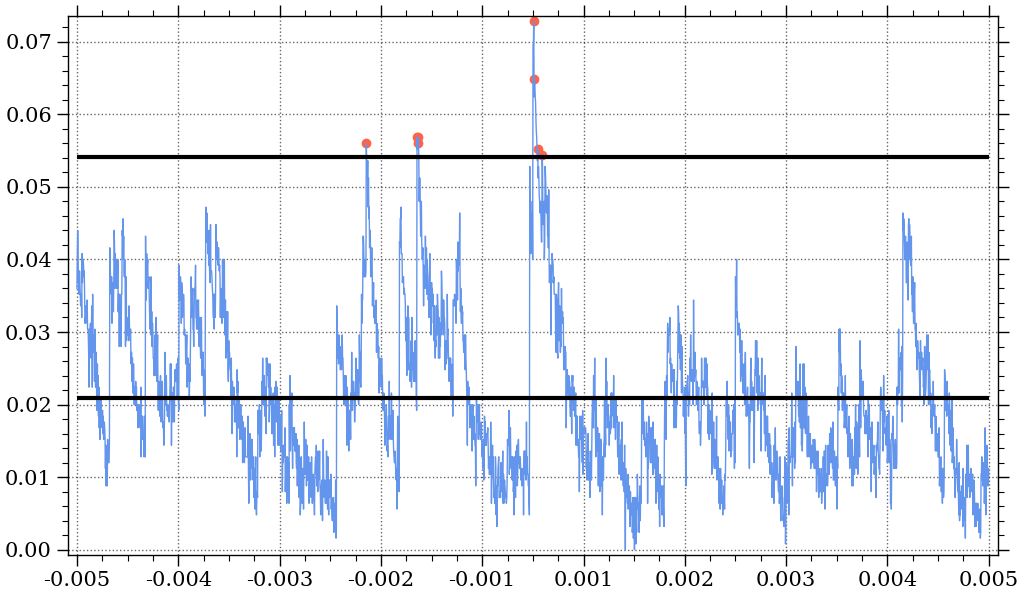

In [ ]:

df = pd.read_csv(join(path, onlyfiles[0]))
t = df['Datos'].values
d = df["Tiempo"].values
d_mean = np.mean(d)
d_std = np.std(d)

#Peaks
#Busco los picos en el conjunto de datos -d, para que los valles (que son nuestas detecciónes) se vuelvan picos y así detectarlos con find_peaks.
peak_index = find_peaks(-d,height = -d_mean+ 3*d_std)
peaks_t = np.array([t[i] for i in peak_index[0]])
peaks_signal = np.array([d[i] for i in peak_index[0]])

print(type(peaks_t))
print(peaks_signal)
#PLOT
fig, ax = plt.subplots()
ax.plot(t,-d,linewidth = 1);
ax.hlines(-d_mean + 3*d_std,t[0],t[-1],color = 'black');
ax.hlines(-d_mean,t[0],t[-1],color = 'black');

xlabels = np.linspace(t[0],t[-1],10,endpoint = True)
ax.set_xticks(xlabels)
ax.set_xticklabels([f'{number:.3f}' for number in xlabels]);

ax.scatter(peaks_t,-peaks_signal,color = 'tomato');



Función para encontrar picos

In [34]:
def get_peaks(data,time):
    d_mean = np.mean(d)
    d_std = np.std(d)
    peak_index = find_peaks(-d,height = -d_mean+ 3*d_std)
    peaks_t = np.array([t[i] for i in peak_index[0]])
    peaks_signal = np.array([d[i] for i in peak_index[0]])

    return peaks_signal, peaks_t

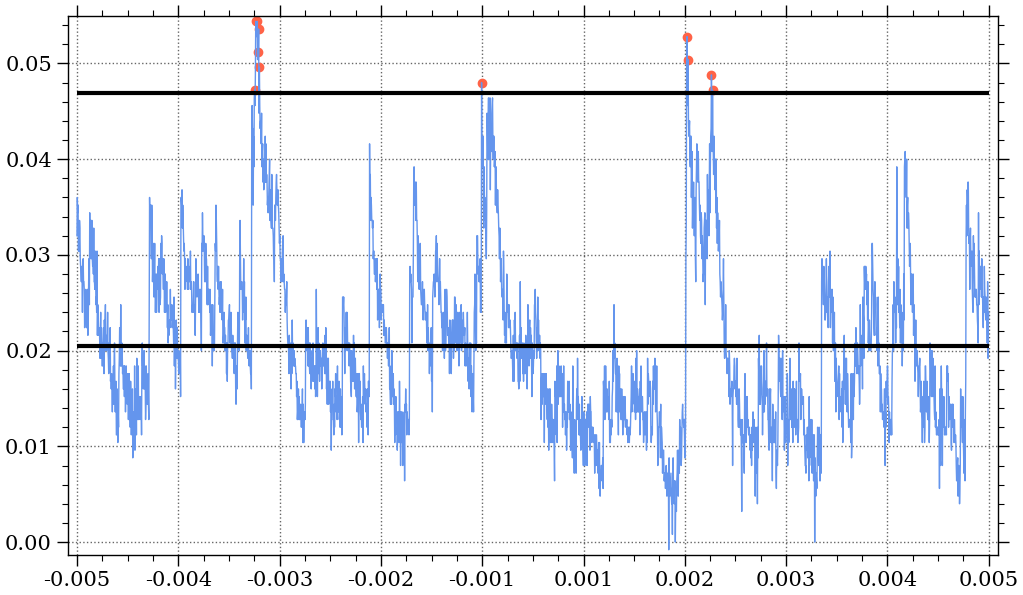

In [37]:
df = pd.read_csv(join(path, onlyfiles[2]))
t = df['Datos'].values
d = df["Tiempo"].values
d_mean = np.mean(d)
d_std = np.std(d)

#Peaks
#Busco los picos en el conjunto de datos -d, para que los valles (que son nuestas detecciónes) se vuelvan picos y así detectarlos con find_peaks.
peaks_signal, peaks_t = get_peaks(d,t)

#PLOT
fig, ax = plt.subplots()
ax.plot(t,-d,linewidth = 1);
ax.hlines(-d_mean + 3*d_std,t[0],t[-1],color = 'black');
ax.hlines(-d_mean,t[0],t[-1],color = 'black');

xlabels = np.linspace(t[0],t[-1],10,endpoint = True)
ax.set_xticks(xlabels)
ax.set_xticklabels([f'{number:.3f}' for number in xlabels]);

ax.scatter(peaks_t,-peaks_signal,color = 'tomato');